In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression 
from math import sqrt
import seaborn as sns
import warnings
from pydataset import data
import evaluate

warnings.filterwarnings('ignore')

In [2]:
df = data('tips')

In [3]:
from statsmodels.formula.api import ols

In [4]:
x = df['tip']
y = df['total_bill']

In [5]:
model = ols('total_bill ~ tip', data=df).fit()
df['yhat'] = model.predict(x)

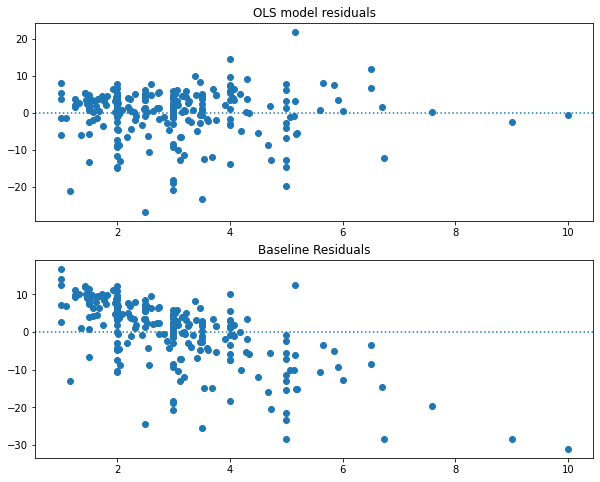

In [6]:
evaluate.plot_residuals(df, model, x, y)

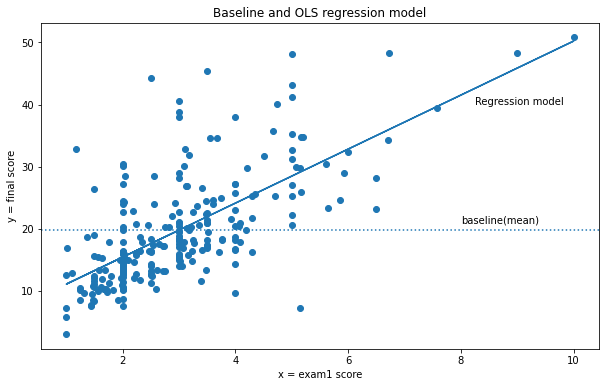

In [7]:
evaluate.plot_baseline_OLS_model(df, x, y)

In [8]:
SSE, MSE, ESS, TSS, RMSE, R2 = evaluate.regression_errors(df, y)

The Sum of Squared Errors is 10464.729955151068,
The Mean Squared Error is 42.88823752111093,
The Explained Sum of Squares = 8793.734128045635,
The Total Sum of Squares is 19258.464083196704,
The Root Mean Squared Error is 6.548911170653556,
and The R-squared value is 0.4566165863516758


In [9]:
SSE_baseline, MSE_baseline, RMSE_baseline = evaluate.baseline_mean_errors(df, y)

The baseline for the Sum of Squared Errors is 19258.46408319672,
The baseline for the Mean Squared Error is 78.92813148851114,
and the baseline for the Root Mean Squared Error is 8.884150577771132


In [10]:
evaluate.better_than_baseline(SSE, MSE, RMSE, SSE_baseline, MSE_baseline, RMSE_baseline)

,metric,model_error,error_delta,is_better_than_baseline
0,SSE,10464.729955,-8793.734128,True
1,MSE,42.888238,-36.039894,True
2,RMSE,6.548911,-2.335239,True


In [11]:
evaluate.model_significance(model, df, y)

p-value for model significance is 6.692470646863541e-34

The Explained Variance Score is 0.457

                            OLS Regression Results                            
Dep. Variable:             total_bill   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Tue, 16 Mar 2021   Prob (F-statistic):           6.69e-34
Time:                        16:50:40   Log-Likelihood:                -804.77
No. Observations:                 244   AIC:                             1614.
Df Residuals:                     242   BIC:                             1621.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------